In [1]:
import sys
sys.path.append('C:/Users/320060820/experiments/')
import fxp_quantize
import model_data

import keras
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# to restart layer numbering
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


In [2]:
save_path = 'C:/Users/320060820/experiments/test_models/'

In [14]:
def test_data_inference_noise(model, test_data, num_splits=10):
    acc = []
    split_index = test_data[0].shape[0] // num_splits
    assert split_index * num_splits == test_data[0].shape[0]
    
    original_acc = model.evaluate(test_data[0], test_data[1], verbose=0)[1]
    
    for i in range(1, num_splits+1):
        t_x = test_data[0][(i-1)*split_index:i*split_index]
        t_y = test_data[1][(i-1)*split_index:i*split_index]
        acc.append(model.evaluate(t_x, t_y, verbose=0)[1])
    acc = np.array(acc)
    
    diff =  (original_acc - acc)
    per_diff =  (original_acc - acc) / original_acc * 100
    
    print('Full test set accuracy:', original_acc)
    print('Accuracy for the 10 folds of test set:', acc)
    print('Difference:', diff)
    print('% Difference:', per_diff)
    
    return acc, original_acc, diff, per_diff

def plot_results(acc, diff, per_diff):
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    ax = axes.flat
    for i in range(3):
        sns.boxplot(data=acc, ax=ax[0])
        ax[0].set_title('Validation accuracies for the folds of test data')
        sns.boxplot(data=diff, ax=ax[1])
        ax[1].set_title('Difference with the full test set')
        sns.boxplot(data=per_diff, ax=ax[2])
        ax[2].set_title('Percentage difference')

## Keras models

Full test set accuracy: 0.7243
Accuracy for the 10 folds of test set: [0.715 0.739 0.712 0.731 0.74  0.735 0.694 0.73  0.716 0.731]
Difference: [ 0.0093 -0.0147  0.0123 -0.0067 -0.0157 -0.0107  0.0303 -0.0057  0.0083
 -0.0067]
% Difference: [ 1.28399834 -2.02954577  1.69819136 -0.92503106 -2.16761011 -1.47728842
  4.18334944 -0.78696673  1.14593401 -0.92503106]


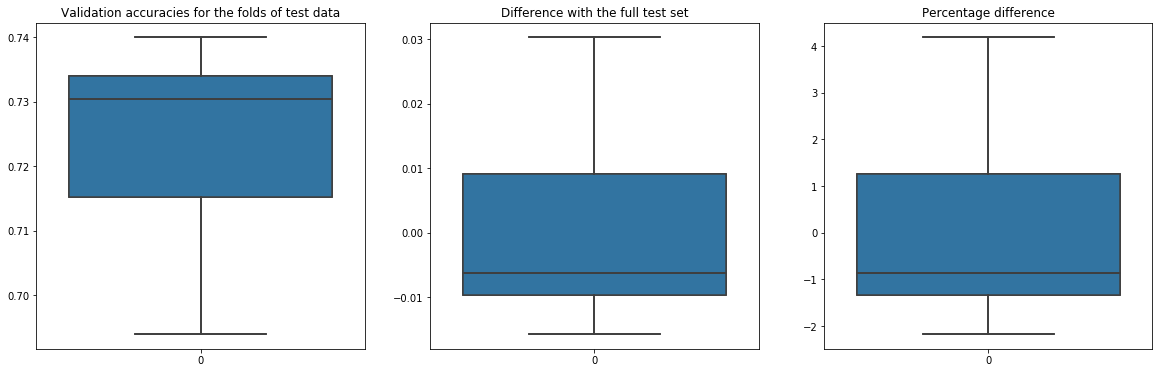

In [15]:
name = 'cifar_keras'
model_path = 'cifar_keras/cifar_keras_new.h5'

from test_models.cifar_keras import data
_, test_data = data.get_data()

K.clear_session()
model = keras.models.load_model(save_path + model_path)
acc, original_acc, diff, per_diff = test_data_inference_noise(model, test_data, num_splits=10)
plot_results(acc, diff, per_diff)

Full test set accuracy: 0.9911
Accuracy for the 10 folds of test set: [0.989 0.988 0.983 0.984 0.991 0.998 0.993 0.998 0.995 0.992]
Difference: [ 2.1e-03  3.1e-03  8.1e-03  7.1e-03  1.0e-04 -6.9e-03 -1.9e-03 -6.9e-03
 -3.9e-03 -9.0e-04]
% Difference: [ 0.21188578  0.31278378  0.81727374  0.71637574  0.0100898  -0.69619615
 -0.19170619 -0.69619615 -0.39350217 -0.09080819]


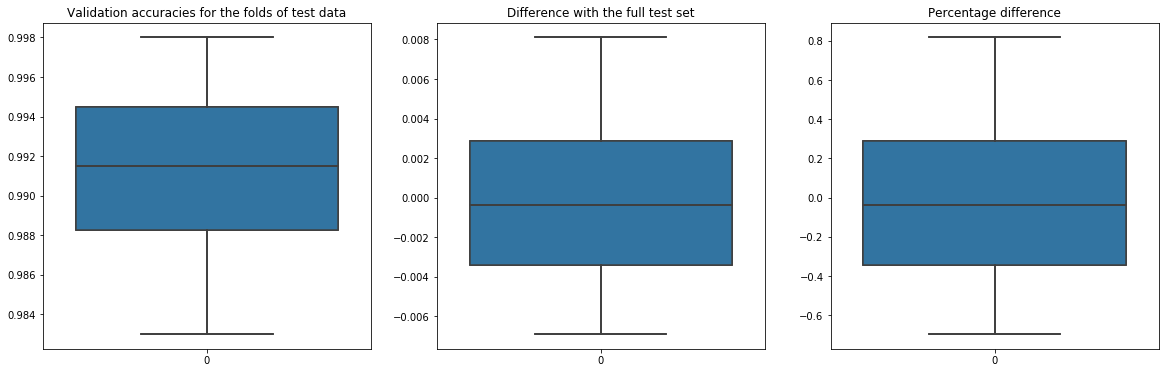

In [16]:
name = 'mnist_keras'
model_path = 'mnist_custom/mnist_keras.h5'

from test_models.mnist_custom import data
_, test_data = data.get_data()

K.clear_session()
model = keras.models.load_model(save_path + model_path)
acc, original_acc, diff, per_diff = test_data_inference_noise(model, test_data, num_splits=10)
plot_results(acc, diff, per_diff)

Full test set accuracy: 0.895
Accuracy for the 10 folds of test set: [0.91  0.899 0.892 0.874 0.894 0.887 0.895 0.903 0.897 0.899]
Difference: [-0.015 -0.004  0.003  0.021  0.001  0.008  0.    -0.008 -0.002 -0.004]
% Difference: [-1.67597765 -0.44692737  0.33519553  2.34636872  0.11173184  0.89385475
  0.         -0.89385475 -0.22346369 -0.44692737]


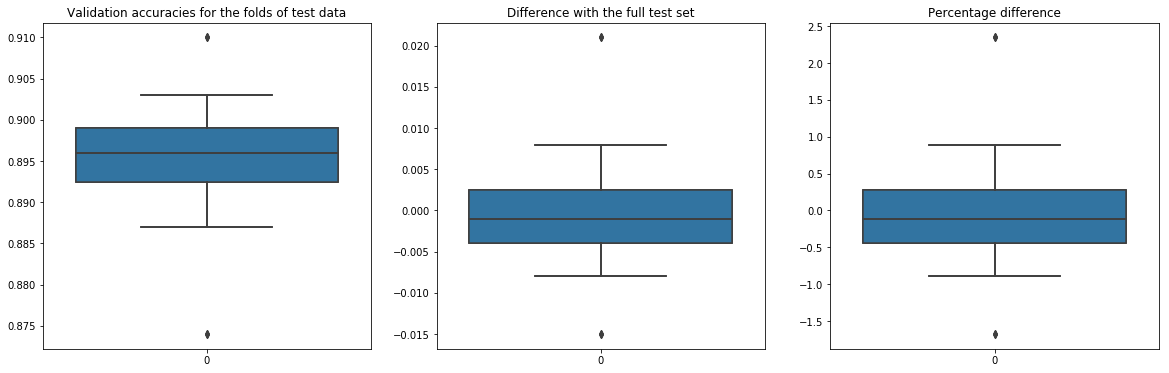

In [17]:
name = 'fashion_keras'
model_path = 'fashion_keras/fashion_keras.h5'

from test_models.fashion_keras import data
_, test_data = data.get_data()

K.clear_session()
model = keras.models.load_model(save_path + model_path)
acc, original_acc, diff, per_diff = test_data_inference_noise(model, test_data, num_splits=10)
plot_results(acc, diff, per_diff)

Full test set accuracy: 0.9146051014136447
Accuracy for the 10 folds of test set: [0.89797173 0.93116165 0.91456669 0.90534726 0.91641057 0.92378611
 0.90719115 0.91149355 0.92747388 0.91518132 0.91026429 0.90780578
 0.91026429 0.92747388 0.91026429 0.9170252 ]
Difference: [ 1.66333745e-02 -1.65565455e-02  3.84142594e-05  9.25783691e-03
 -1.80547015e-03 -9.18100810e-03  7.41395206e-03  3.11155453e-03
 -1.28687766e-02 -5.76214001e-04  4.34081120e-03  6.79932406e-03
  4.34081120e-03 -1.28687766e-02  4.34081146e-03 -2.42009845e-03]
% Difference: [ 1.81864003 -1.8102398   0.00420009  1.01222231 -0.19740434 -1.0038221
  0.81061783  0.34020743 -1.40703093 -0.0630014   0.47461043  0.74341637
  0.47461043 -1.40703093  0.47461046 -0.26460583]


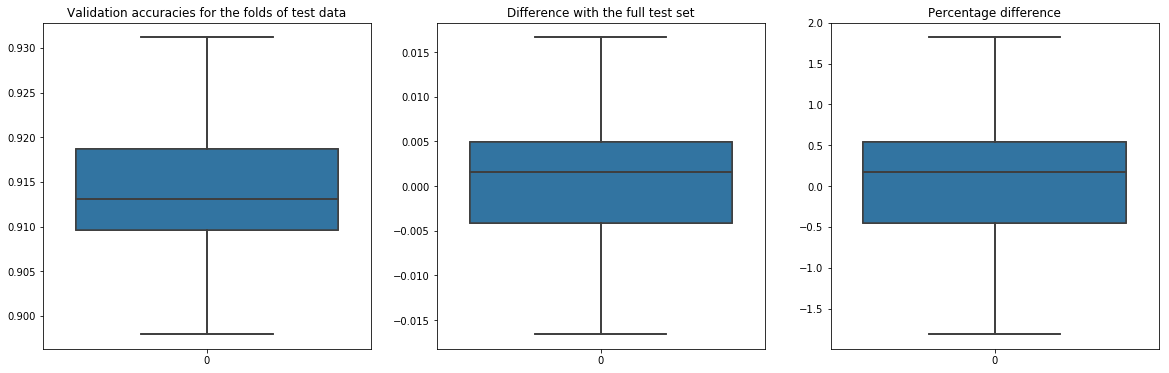

In [18]:
name = 'svhn_keras'
model_path = 'svhn_keras/svhn_keras.h5'

from test_models.svhn_keras import data
_, test_data = data.get_data()

K.clear_session()
model = keras.models.load_model(save_path + model_path)
acc, original_acc, diff, per_diff = test_data_inference_noise(model, test_data, num_splits=16)
plot_results(acc, diff, per_diff)

## Dragonfly models

Full test set accuracy: 0.7452
Accuracy for the 10 folds of test set: [0.73  0.741 0.739 0.742 0.752 0.743 0.753 0.752 0.751 0.749]
Difference: [ 0.0152  0.0042  0.0062  0.0032 -0.0068  0.0022 -0.0078 -0.0068 -0.0058
 -0.0038]
% Difference: [ 2.03972088  0.56360709  0.83199141  0.42941492 -0.91250671  0.29522276
 -1.04669887 -0.91250671 -0.77831455 -0.50993022]


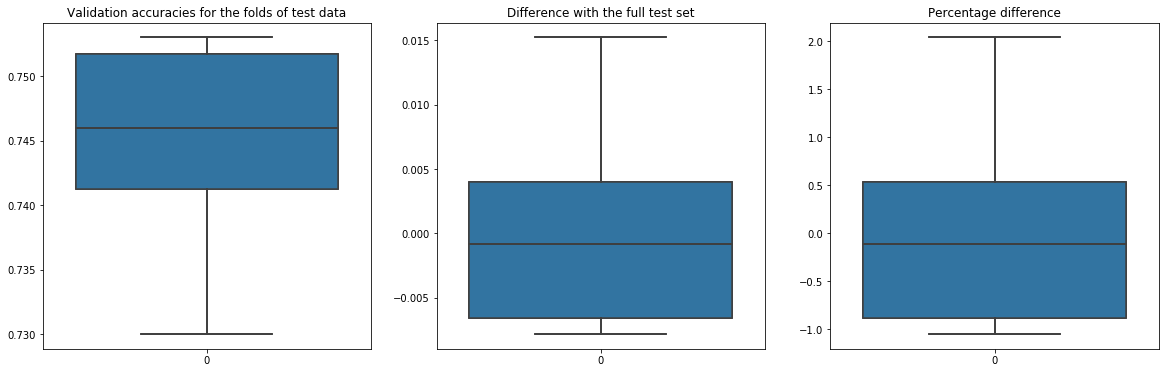

In [19]:
name = 'cifar_df'
model_path = 'cifar_df2/model_32_0.75.h5'

from test_models.cifar_df2 import data
_, test_data = data.get_data()

K.clear_session()
model = keras.models.load_model(save_path + model_path)
acc, original_acc, diff, per_diff = test_data_inference_noise(model, test_data, num_splits=10)
plot_results(acc, diff, per_diff)

Full test set accuracy: 0.9808
Accuracy for the 10 folds of test set: [0.976 0.972 0.971 0.973 0.977 0.992 0.984 0.998 0.987 0.978]
Difference: [ 0.0048  0.0088  0.0098  0.0078  0.0038 -0.0112 -0.0032 -0.0172 -0.0062
  0.0028]
% Difference: [ 0.48939641  0.89722675  0.99918434  0.79526917  0.38743883 -1.14192496
 -0.32626427 -1.75367047 -0.63213703  0.28548124]


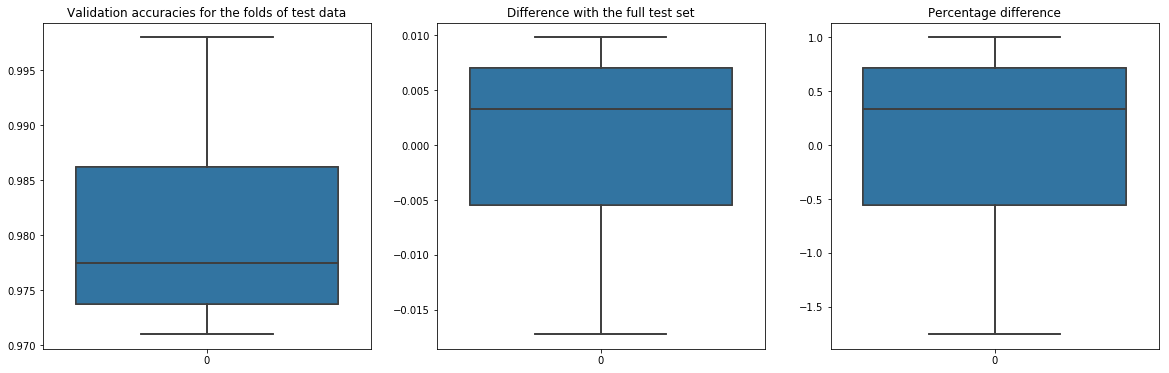

In [20]:
name = 'mnist_df'
model_path = 'mnist_df/inception_v3_model_batchnorm.h5'

from test_models.mnist_df import data
_, test_data = data.get_data()

K.clear_session()
model = keras.models.load_model(save_path + model_path)
acc, original_acc, diff, per_diff = test_data_inference_noise(model, test_data, num_splits=10)
plot_results(acc, diff, per_diff)

Full test set accuracy: 0.9106
Accuracy for the 10 folds of test set: [0.919 0.912 0.894 0.899 0.917 0.895 0.909 0.925 0.911 0.925]
Difference: [-0.0084 -0.0014  0.0166  0.0116 -0.0064  0.0156  0.0016 -0.0144 -0.0004
 -0.0144]
% Difference: [-0.9224687  -0.15374478  1.82297386  1.27388535 -0.7028333   1.71315616
  0.17570832 -1.58137492 -0.04392708 -1.58137492]


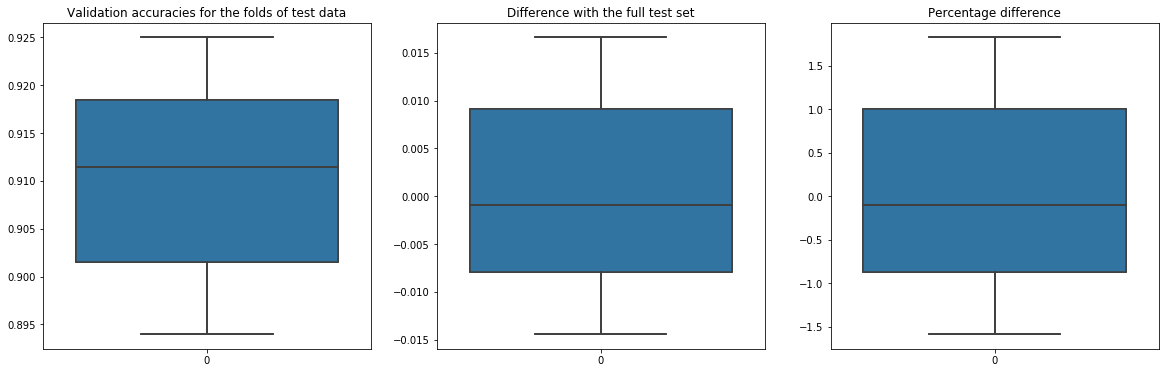

In [21]:
name = 'fashion_df'
model_path = 'fashion_df/fashion_df.h5'

from test_models.fashion_df import data
_, test_data = data.get_data()

K.clear_session()
model = keras.models.load_model(save_path + model_path)
acc, original_acc, diff, per_diff = test_data_inference_noise(model, test_data, num_splits=10)
plot_results(acc, diff, per_diff)

Full test set accuracy: 0.921980639213276
Accuracy for the 10 folds of test set: [0.90964966 0.92255685 0.92931776 0.92685925 0.92931776 0.92194222
 0.92071297 0.92255685 0.92562999 0.92685925 0.91886908 0.91395206
 0.91948371 0.91948371 0.91825446 0.92624462]
Difference: [ 1.23309775e-02 -5.76214001e-04 -7.33712354e-03 -4.87861054e-03
 -7.33712376e-03  3.84145158e-05  1.26767019e-03 -5.76214001e-04
 -3.64935501e-03 -4.87861131e-03  3.11155490e-03  8.02857999e-03
  2.49692701e-03  2.49692712e-03  3.72618331e-03 -4.26398316e-03]
% Difference: [ 1.3374443  -0.06249741 -0.79580017 -0.52914458 -0.7958002   0.00416652
  0.13749423 -0.06249741 -0.39581688 -0.52914466  0.33748593  0.87079703
  0.27082206  0.27082208  0.40414984 -0.46248077]


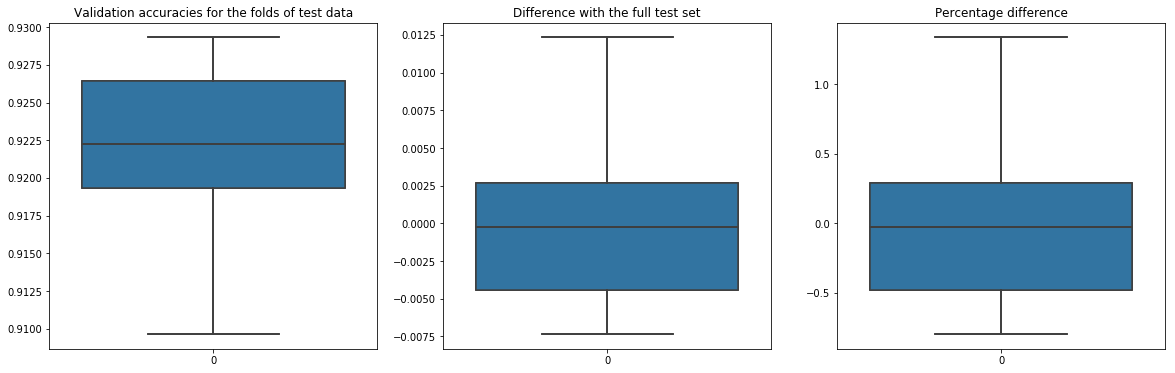

In [22]:
name = 'svhn_df'
model_path = 'svhn_df/svhn_df.h5'

from test_models.svhn_df import data
_, test_data = data.get_data()

K.clear_session()
model = keras.models.load_model(save_path + model_path)
acc, original_acc, diff, per_diff = test_data_inference_noise(model, test_data, num_splits=16)
plot_results(acc, diff, per_diff)